# Импорт библиотек

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats

1. Расчет корреляции, оценка меры связи. Построение гистограммы рассеяния, линии аппроксимации и рассчет величины достоверности аппроксимации R^2.

In [36]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [37]:
# Расчет корреляции между median_income и median_house_value
correlation, p_value = stats.pearsonr(df['median_income'], df['median_house_value'])
print(f"Коэффициент корреляции Пирсона: {correlation:.2f}")
print(f"p-значение: {p_value:.2f}")

Коэффициент корреляции Пирсона: 0.69
p-значение: 0.00


1. Коэффициент корреляции 0.69 указывает на умеренную положительную связь между переменными.
2. p-значение 0.00 указывает на то, что вероятность получить такую корреляцию случайно (при условии, что нулевая гипотеза верна) стремится к 0. Так как p-значение меньше 0.05, мы отвергаем нулевую гипотезу и принимаем альтернативную гипотезу о том, что корреляция между переменными статистически значима.

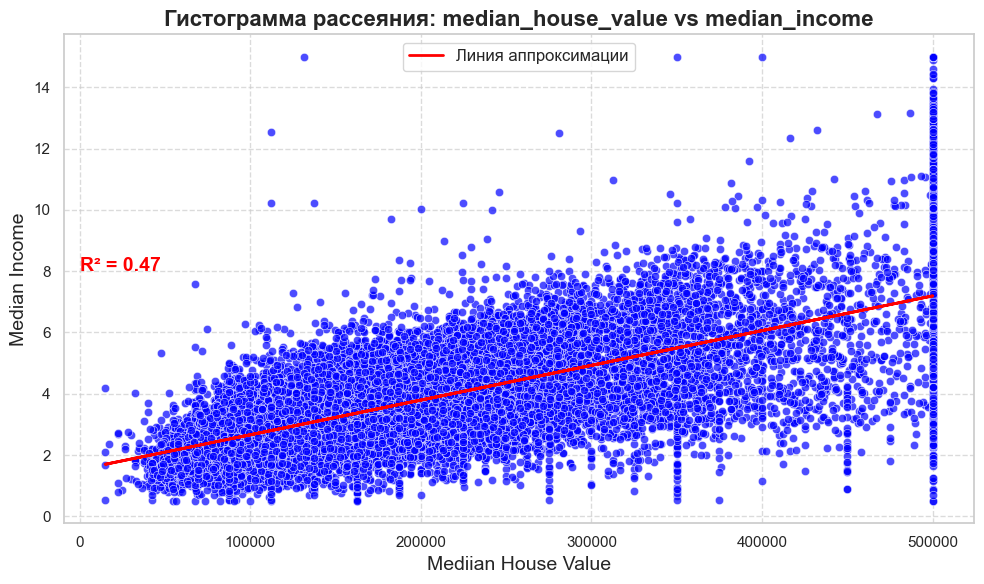

In [38]:
# Построение гистограммы рассеяния
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.scatterplot(x='median_house_value', y='median_income', data=df, color='blue', alpha=0.7)
plt.title('Гистограмма рассеяния: median_house_value vs median_income', fontsize=16, fontweight='bold')
plt.xlabel('Mediian House Value', fontsize=14)
plt.ylabel('Median Income', fontsize=14)

# Добавление линии аппроксимации
X = df[['median_house_value']]
y = df['median_income']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.plot(X, y_pred, color='red', linewidth=2, label='Линия аппроксимации')

# Расчет коэффициента детерминации R^2
r_squared = model.score(X, y)
plt.text(20, 8, f'R² = {r_squared:.2f}', fontsize=14, color='red', fontweight='bold')

plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

2. Cделать выборку =~ 1/3 наблюдений:

- случайным образом,
- сделать стратифицированную выборку (разбив выборку на группы по смысловому содержанию - близость расположения к океану (ocean_proximity)).

In [39]:
# Случайная выборка (~1/3 наблюдений)
random_sample = df.sample(frac=1/3, random_state=42)

print("Случайная выборка:")
print(random_sample.head())

Случайная выборка:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20046    -119.01     36.06                25.0       1505.0             NaN   
3024     -119.46     35.14                30.0       2943.0             NaN   
15663    -122.44     37.80                52.0       3830.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   
9814     -121.93     36.62                34.0       2351.0             NaN   

       population  households  median_income  median_house_value  \
20046      1392.0       359.0         1.6812             47700.0   
3024       1565.0       584.0         2.5313             45800.0   
15663      1310.0       963.0         3.4801            500001.0   
20484      1705.0       495.0         5.7376            218600.0   
9814       1063.0       428.0         3.7250            278000.0   

      ocean_proximity  
20046          INLAND  
3024           INLAND  
15663        NEAR BAY  
2

In [40]:
# Стратифицированная выборка (~1/3 наблюдений)
stratified_sample = df.groupby('ocean_proximity', group_keys=False).apply(lambda x: x.sample(frac=1/3, random_state=42))

print("Стратифицированная выборка:")
print(stratified_sample.head())

Стратифицированная выборка:
      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3925    -118.56     34.18                36.0       1366.0           224.0   
922     -121.92     37.53                 7.0      28258.0          3864.0   
7643    -118.27     33.82                33.0       1596.0           337.0   
4730    -118.36     34.05                48.0       1835.0           380.0   
7334    -118.18     33.98                40.0       1698.0           431.0   

      population  households  median_income  median_house_value  \
3925       719.0       270.0         4.8264            251000.0   
922      12203.0      3701.0         8.4045            451100.0   
7643      1650.0       329.0         4.3687            173500.0   
4730       956.0       370.0         3.2813            243600.0   
7334      1280.0       405.0         2.6250            206300.0   

     ocean_proximity  
3925       <1H OCEAN  
922        <1H OCEAN  
7643       <1H OCEAN  
4730    

C:\Users\User\AppData\Local\Temp\ipykernel_16920\4086903534.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = df.groupby('ocean_proximity', group_keys=False).apply(lambda x: x.sample(frac=1/3, random_state=42))


3. Посчитать:

- среднее значение по выборкам из п.2 (2.1 случайной и 2.2 стратифицированной),
- доверительный интервал для среднего (на уровне доверия 90%, 95%, 99%).
- - Сравнить среднее генеральной выборки п.2 с полученными в выборках 2.1 и 2.2 и с границами доверительных интервалов из п.3.2.

In [41]:
# Функция для расчета доверительного интервала
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    se = stats.sem(data)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean, mean - h, mean + h

# 1. Среднее значение по выборкам
random_sample = df.sample(frac=0.5, random_state=1)
stratified_sample = df.groupby('ocean_proximity', group_keys=False).apply(lambda x: x.sample(frac=0.5, random_state=1))

random_mean = random_sample['ocean_proximity'].value_counts().mean()
stratified_mean = stratified_sample['ocean_proximity'].value_counts().mean()

print(f"Среднее значение случайной выборки: {random_mean:.2f}")
print(f"Среднее значение стратифицированной выборки: {stratified_mean:.2f}")

# 2. Доверительные интервалы для среднего
random_ci_90 = confidence_interval(random_sample['ocean_proximity'].value_counts(), confidence=0.90)
random_ci_95 = confidence_interval(random_sample['ocean_proximity'].value_counts(), confidence=0.95)
random_ci_99 = confidence_interval(random_sample['ocean_proximity'].value_counts(), confidence=0.99)

stratified_ci_90 = confidence_interval(stratified_sample['ocean_proximity'].value_counts(), confidence=0.90)
stratified_ci_95 = confidence_interval(stratified_sample['ocean_proximity'].value_counts(), confidence=0.95)
stratified_ci_99 = confidence_interval(stratified_sample['ocean_proximity'].value_counts(), confidence=0.99)

print("\nДоверительные интервалы для случайной выборки:")
print(f"90%: ({random_ci_90[1]:.2f}, {random_ci_90[2]:.2f})")
print(f"95%: ({random_ci_95[1]:.2f}, {random_ci_95[2]:.2f})")
print(f"99%: ({random_ci_99[1]:.2f}, {random_ci_99[2]:.2f})")

print("\nДоверительные интервалы для стратифицированной выборки:")
print(f"90%: ({stratified_ci_90[1]:.2f}, {stratified_ci_90[2]:.2f})")
print(f"95%: ({stratified_ci_95[1]:.2f}, {stratified_ci_95[2]:.2f})")
print(f"99%: ({stratified_ci_99[1]:.2f}, {stratified_ci_99[2]:.2f})")

# 3. Сравнение среднего генеральной выборки с выборками и границами доверительных интервалов
population_mean = df['ocean_proximity'].value_counts().mean()

print(f"\nСреднее значение генеральной выборки: {population_mean:.2f}")

print("\nСравнение среднего генеральной выборки с выборками:")
print(f"Случайная выборка: {population_mean:.2f} {'входит' if random_ci_95[1] <= population_mean <= random_ci_95[2] else 'не входит'} в 95% доверительный интервал")
print(f"Стратифицированная выборка: {population_mean:.2f} {'входит' if stratified_ci_95[1] <= population_mean <= stratified_ci_95[2] else 'не входит'} в 95% доверительный интервал")

Среднее значение случайной выборки: 2064.00
Среднее значение стратифицированной выборки: 2064.00

Доверительные интервалы для случайной выборки:
90%: (308.93, 3819.07)
95%: (-221.75, 4349.75)
99%: (-1726.39, 5854.39)

Доверительные интервалы для стратифицированной выборки:
90%: (320.60, 3807.40)
95%: (-206.55, 4334.55)
99%: (-1701.18, 5829.18)

Среднее значение генеральной выборки: 4128.00

Сравнение среднего генеральной выборки с выборками:
Случайная выборка: 4128.00 входит в 95% доверительный интервал
Стратифицированная выборка: 4128.00 входит в 95% доверительный интервал


C:\Users\User\AppData\Local\Temp\ipykernel_16920\326299157.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = df.groupby('ocean_proximity', group_keys=False).apply(lambda x: x.sample(frac=0.5, random_state=1))


1. Средние значения выборок равны, что указывает на схожесть распределения по дням недели в обеих выборках.

2. Доверительные интервалы для 95% и 99% включают отрицательные значения, что может указывать на ненормальное распределение данных или малый размер выборки.

3. Среднее значение генеральной выборки попадает в доверительные интервалы 95% для обеих выборок.